In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import os

sys.path.append(os.path.join(os.path.abspath('.'),'../..'))

In [2]:
import plankton.plankton as pl
import matplotlib.pyplot as plt
import numpy as np

##### Load coordinate data:

In [3]:
from urllib import request

# Define base URL path to the data
ISS_link = "https://export.uppmax.uu.se/snic2022-23-113/courses/spatial_omics_2022/in_situ_sequencing/S2T1_pcw6.csv"    

# Create directory for the dataset
os.makedirs( "./data/in_situ_sequencing" , exist_ok= True )

# Download necessary tar.gz files
# for tar_file in ["raw_tiles_with_z.tar.gz","SpaceTX.tar.gz"]:
#     print ("Downloading " + base_path + tar_file)
request.urlretrieve(ISS_link , "./data/in_situ_sequencing/coordinates.csv" )



('./data/in_situ_sequencing/coordinates.csv',
 <http.client.HTTPMessage at 0x7f4c3da43040>)

##### Load background image:

In [4]:
# from PIL import Image
# Image.MAX_IMAGE_PIXELS = 933120000

# image_file='background.png'
# image_resolution=umpp #um/px
# image_downsampling=0.1 #downsample image to 10% resolution for faster plotting

# bg = Image.open(os.path.join(data_folder,image_file),) 
# bg = bg.resize((int(bg.width*image_downsampling),int(bg.height*image_downsampling)),Image.ANTIALIAS)
# bg = np.array(bg.getdata()).reshape((bg.height,bg.width,-1)).sum(-1)

# bgmap = pl.PixelMap(bg,upscale=1/image_downsampling/image_resolution)


In [5]:
import pandas as pd
coordinates = pd.read_csv('./data/in_situ_sequencing/coordinates.csv')

In [6]:
coordinates

,Gene,Global_y_pos,Global_x_pos,Q,parentCell
0,FLT1,4909.911982,1190.493724,1190.493724,1190.493724
1,FLT1,4908.912407,1194.492023,1194.492023,1194.492023
2,JAG2,4852.936212,1614.313488,1614.313488,1614.313488
3,RSPO2,4940.898805,1634.304986,1634.304986,1634.304986
4,SPRY1,4982.880951,1759.251850,1759.251850,1759.251850
...,...,...,...,...,...
494144,MET,11432.138303,9209.083692,9209.083692,9209.083692
494145,FGFR4,10289.624175,9292.048410,9292.048410,9292.048410
494146,FGFR4,11295.196539,9343.026730,9343.026730,9343.026730
494147,DTX1,13125.418209,9475.970194,9475.970194,9475.970194


In [7]:
sdata = pl.SpatialData(x_coordinates=coordinates.Global_x_pos,
                       y_coordinates=coordinates.Global_y_pos,
                       genes=coordinates.Gene
                      )[::3] 

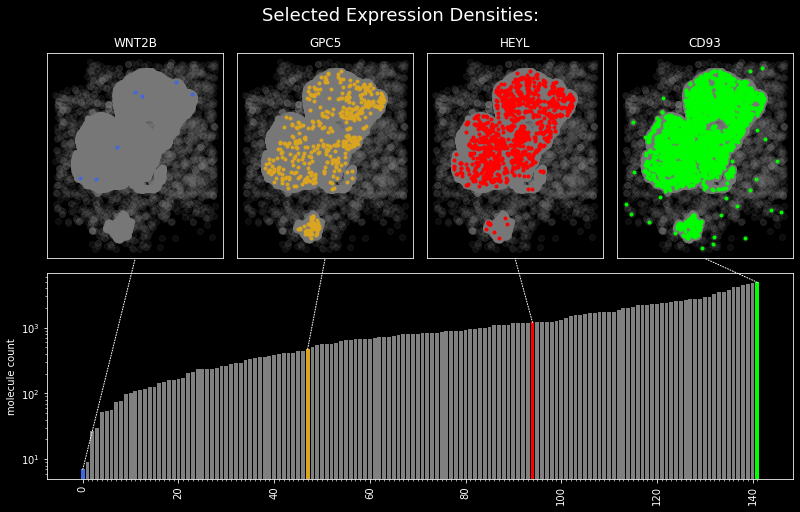

In [8]:
sdata.plot_overview()

(<matplotlib.collections.PathCollection at 0x7f4bdd60f4c0>, None, None)

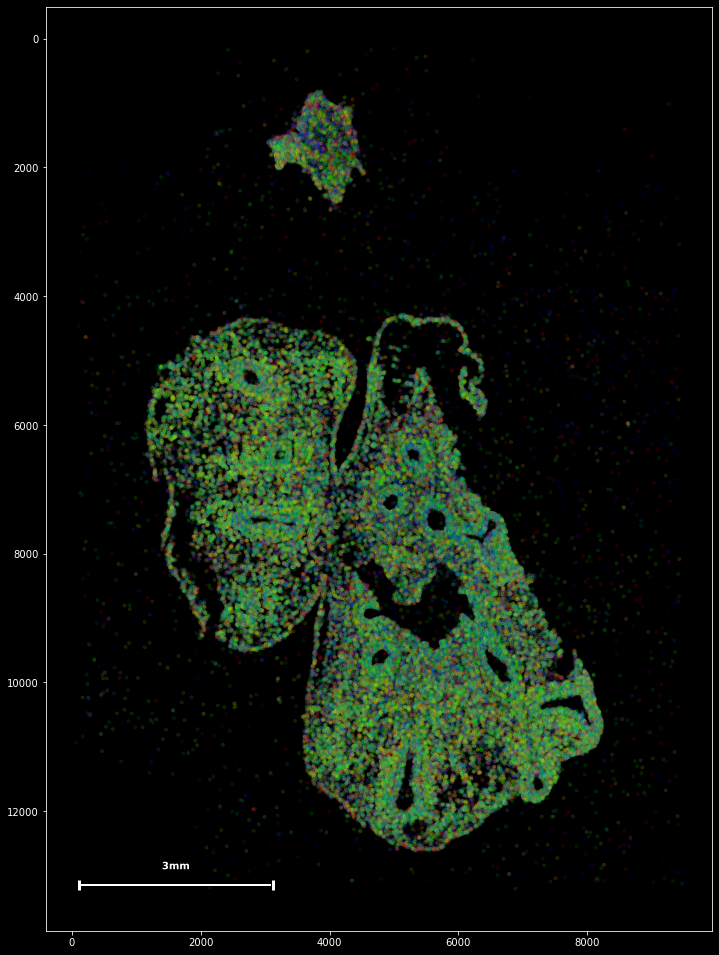

In [9]:
plt.figure(figsize=(17,17))
sdata.scatter(alpha=0.1,marker='.')

In [32]:
knn_neighbors=250
bandwidth=12
n_neighbors=10
metric='euclidean'
min_dist=0.01
random_state=42
zero_weight=0.0

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)



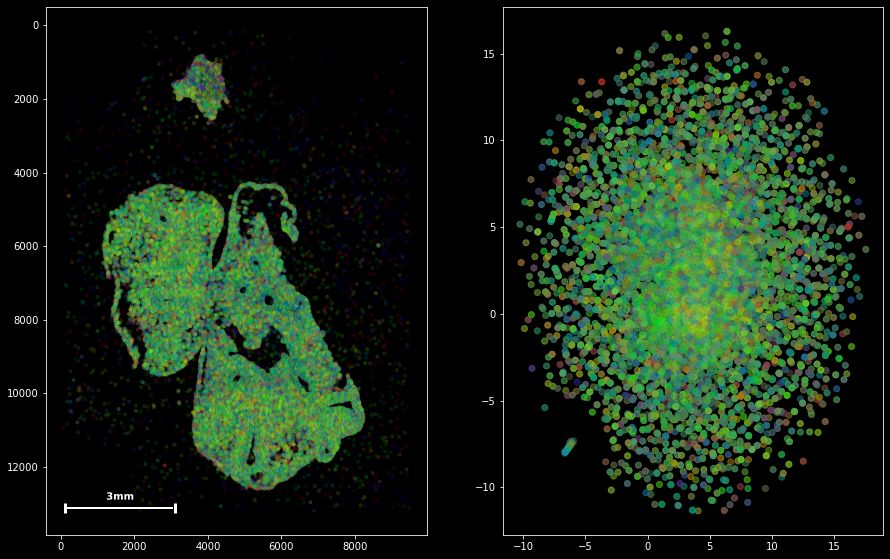

In [33]:
sdata.graph.map_and_umap(alpha=0.1)

In [34]:
sdata.graph.umap_js()

    'data': [{'hoverinfo': 'none',
              'marker': {'colo…

In [13]:
# sdata[sdata.noise].scatter()

In [14]:
plt.plot(sdata.selection1.isna())

AttributeError: 'SpatialData' object has no attribute 'selection1'

In [18]:
sdata

,g,x,y,gene_id,noise
0,FLT1,1190.493724,4909.911982,47,True
3,RSPO2,1634.304986,4940.898805,107,False
6,SPRY1,1762.250575,4873.927285,120,False
9,SPRY1,1768.248025,4985.879676,120,False
12,SPRY1,1773.245899,4878.925160,120,False
...,...,...,...,...,...
494136,FGFR4,8576.352771,12636.626075,46,True
494139,WIF1,8787.263078,11735.009502,135,True
494142,FGFR4,9019.164458,10110.700265,46,True
494145,FGFR4,9292.048410,10289.624175,46,True
